In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
df=pd.read_csv('E:\Susmita_Backup\Data Science Course\Data Science Assignment\Support Vector Machine\SalaryData_Train.csv', skipinitialspace=True)

In [3]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educationno'>

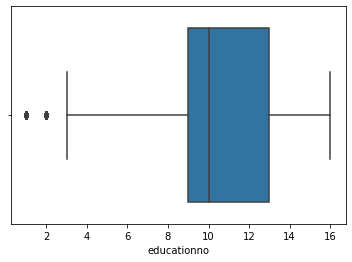

In [6]:
import seaborn as sns
sns.boxplot(df['educationno'])

C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hoursperweek'>

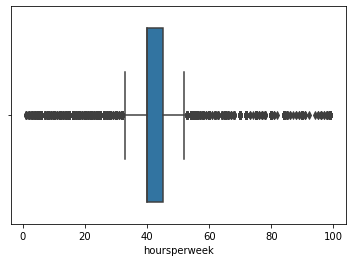

In [7]:
sns.boxplot(df['hoursperweek'])

In [8]:
df=df.drop(['educationno','capitalgain','capitalloss','hoursperweek'],axis=1)

In [9]:
df

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
30157,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
30158,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
30159,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [10]:
df.native.value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Columbia                         56
Poland                           56
Haiti                            42
Iran                             42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

In [11]:
data=df.drop(['native'],axis=1)

In [12]:
data.workclass.value_counts()

Private             22285
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [13]:
data.education.value_counts()

HS-grad         9840
Some-college    6677
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

In [14]:
data.maritalstatus.value_counts()

Married-civ-spouse       14065
Never-married             9725
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [15]:
data.occupation.value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1965
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [16]:
data.relationship.value_counts()

Husband           12463
Not-in-family      7726
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      888
Name: relationship, dtype: int64

In [17]:
data.race.value_counts()

White                 25932
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64

In [18]:
data.sex.value_counts()

Male      20380
Female     9781
Name: sex, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [20]:
data.iloc[:,1]=labelencoder.fit_transform(data.iloc[:,1])
data.iloc[:,2]=labelencoder.fit_transform(data.iloc[:,2])
data.iloc[:,3]=labelencoder.fit_transform(data.iloc[:,3])
data.iloc[:,4]=labelencoder.fit_transform(data.iloc[:,4])
data.iloc[:,5]=labelencoder.fit_transform(data.iloc[:,5])
data.iloc[:,6]=labelencoder.fit_transform(data.iloc[:,6])
data.iloc[:,7]=labelencoder.fit_transform(data.iloc[:,7])

In [21]:
data

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,Salary
0,39,5,9,4,0,1,4,1,<=50K
1,50,4,9,2,3,0,4,1,<=50K
2,38,2,11,0,5,1,4,1,<=50K
3,53,2,1,2,5,0,2,1,<=50K
4,28,2,9,2,9,5,2,0,<=50K
...,...,...,...,...,...,...,...,...,...
30156,27,2,7,2,12,5,4,0,<=50K
30157,40,2,11,2,6,0,4,1,>50K
30158,58,2,11,6,0,4,4,0,<=50K
30159,22,2,11,4,0,3,4,1,<=50K


In [22]:
data.Salary.value_counts()

<=50K    22653
>50K      7508
Name: Salary, dtype: int64

In [23]:
data['Salary']= [0 if i== '<=50K' else 1 for i in data['Salary']]

In [24]:
data

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,Salary
0,39,5,9,4,0,1,4,1,0
1,50,4,9,2,3,0,4,1,0
2,38,2,11,0,5,1,4,1,0
3,53,2,1,2,5,0,2,1,0
4,28,2,9,2,9,5,2,0,0
...,...,...,...,...,...,...,...,...,...
30156,27,2,7,2,12,5,4,0,0
30157,40,2,11,2,6,0,4,1,1
30158,58,2,11,6,0,4,4,0,0
30159,22,2,11,4,0,3,4,1,0


In [25]:
x=data.iloc[:,0:8]
y=data.iloc[:,8]

In [ ]:
#Grid Search CV

In [ ]:
gsv.best_scores_

In [ ]:
gsv.best_params_

In [ ]:
clf = SVC(kernel='rbf',C=15 , gamma = 10)
clf.fit(x,y)
y_pred = clf.predict(x)
acc = accuracy_score(y, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y, y_pred)

In [2]:
df1=pd.read_csv('E:\Susmita_Backup\Data Science Course\Data Science Assignment\Support Vector Machine\SalaryData_Test.csv', skipinitialspace=True)

In [3]:
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
df1.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [5]:
data1=df1.drop(['educationno','capitalgain','capitalloss','hoursperweek','native'],axis=1)

In [6]:
data1

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,Salary
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,>50K
4,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,<=50K
...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,<=50K
15056,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,<=50K
15057,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,<=50K
15058,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,<=50K


In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [8]:
data1.iloc[:,1]=labelencoder.fit_transform(data1.iloc[:,1])
data1.iloc[:,2]=labelencoder.fit_transform(data1.iloc[:,2])
data1.iloc[:,3]=labelencoder.fit_transform(data1.iloc[:,3])
data1.iloc[:,4]=labelencoder.fit_transform(data1.iloc[:,4])
data1.iloc[:,5]=labelencoder.fit_transform(data1.iloc[:,5])
data1.iloc[:,6]=labelencoder.fit_transform(data1.iloc[:,6])
data1.iloc[:,7]=labelencoder.fit_transform(data1.iloc[:,7])

In [9]:
data1

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,Salary
0,25,2,1,4,6,3,2,1,<=50K
1,38,2,11,2,4,0,4,1,<=50K
2,28,1,7,2,10,0,4,1,>50K
3,44,2,15,2,6,0,2,1,>50K
4,34,2,0,4,7,1,4,1,<=50K
...,...,...,...,...,...,...,...,...,...
15055,33,2,9,4,9,3,4,1,<=50K
15056,39,2,9,0,9,1,4,0,<=50K
15057,38,2,9,2,9,0,4,1,<=50K
15058,44,2,9,0,0,3,1,1,<=50K


In [10]:
data1.Salary.value_counts()

<=50K    11360
>50K      3700
Name: Salary, dtype: int64

In [11]:
data1['Salary']= [0 if i== '<=50K' else 1 for i in data1['Salary']]

In [12]:
data1

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,Salary
0,25,2,1,4,6,3,2,1,0
1,38,2,11,2,4,0,4,1,0
2,28,1,7,2,10,0,4,1,1
3,44,2,15,2,6,0,2,1,1
4,34,2,0,4,7,1,4,1,0
...,...,...,...,...,...,...,...,...,...
15055,33,2,9,4,9,3,4,1,0
15056,39,2,9,0,9,1,4,0,0
15057,38,2,9,2,9,0,4,1,0
15058,44,2,9,0,0,3,1,1,0


In [16]:
data1.Salary.value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

In [13]:
x1=data1.iloc[:,0:8]
y1=data1.iloc[:,8]

In [ ]:
#clf = SVC()
#param_grid = [{'kernel':['rbf'],'gamma':[40,20,15,10],'C':[15,10,0.1,0.001] }]
#gsv = GridSearchCV(clf,param_grid,cv=10)
#gsv.fit(x1,y1)

In [14]:
clf1 = SVC(kernel='rbf',C= 15, gamma = 10 )
clf1.fit(x1,y1)
y_pred1 = clf1.predict(x1)
acc1 = accuracy_score(y1, y_pred1) * 100
print("Accuracy =", acc1)
confusion_matrix(y1, y_pred1)

Accuracy = 94.03054448871183


array([[11138,   222],
       [  677,  3023]], dtype=int64)

In [15]:
print(classification_report(y1,y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     11360
           1       0.93      0.82      0.87      3700

    accuracy                           0.94     15060
   macro avg       0.94      0.90      0.92     15060
weighted avg       0.94      0.94      0.94     15060



In [18]:
pd.Series(y_pred1).value_counts()

0    11815
1     3245
dtype: int64

In [23]:
pd.DataFrame({'Salary':y1,'PredictedSalary':y_pred1})

,Salary,PredictedSalary
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
15055,0,0
15056,0,0
15057,0,1
15058,0,0


In [27]:
final=pd.DataFrame(y_pred1,columns=['PredictedSalary'])
pd.concat([data1,final],axis=1)

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,Salary,PredictedSalary
0,25,2,1,4,6,3,2,1,0,0
1,38,2,11,2,4,0,4,1,0,0
2,28,1,7,2,10,0,4,1,1,1
3,44,2,15,2,6,0,2,1,1,1
4,34,2,0,4,7,1,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,4,9,3,4,1,0,0
15056,39,2,9,0,9,1,4,0,0,0
15057,38,2,9,2,9,0,4,1,0,1
15058,44,2,9,0,0,3,1,1,0,0


In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [33]:
num_folds=10
seed=7
kfold=KFold(n_splits=num_folds)
model=SVC(kernel='rbf',C=15,gamma=10)
results=cross_val_score(model,x1,y1,cv=kfold)

In [34]:
results.mean()

0.7774236387782205